In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [34]:
def read_image(image_path):
    image = cv2.imread(image_path)
    return image

image = read_image("Screenshot 2025-02-06 114631.png")

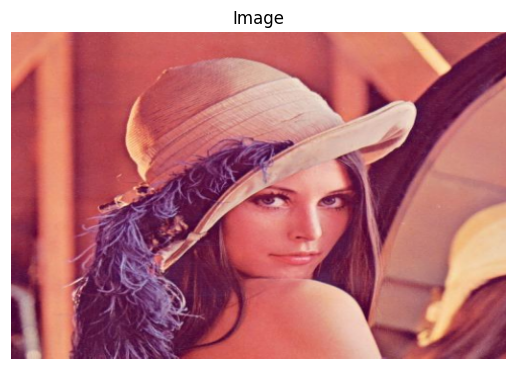

In [35]:
def display_image(image, title="Image"):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title(title)
    plt.axis("off")
    plt.show()
display_image(image)


In [36]:
def image_size(image):
    height, width, channels = image.shape
    print(f"Image Size: {width}x{height}, Channels: {channels}")
image_size(image)


Image Size: 491x324, Channels: 3


In [37]:
def calculate_pixels(image):
    pixels = image.size
    print(f"Total Pixels: {pixels}")
calculate_pixels(image)

Total Pixels: 477252


In [38]:
def convert_to_grayscale(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite("grayscale.jpg", gray)
    return gray
gray = convert_to_grayscale(image)


In [39]:
def convert_to_binary(image, threshold=127):
    _, binary = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    cv2.imwrite("binary.jpg", binary)
    return binary
binary = convert_to_binary(gray)


In [40]:
def count_black_pixels(binary_image):
    black_pixels = np.sum(binary_image == 0)
    print(f"Black Pixels Count: {black_pixels}")
count_black_pixels(binary)


Black Pixels Count: 79164


In [41]:
def edge_detection(image):
    gray = convert_to_grayscale(image)
    edges_sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 1, ksize=5)
    edges_prewitt = cv2.filter2D(gray, -1, np.array([[1,1,1], [0,0,0], [-1,-1,-1]]))
    edges_roberts = cv2.filter2D(gray, -1, np.array([[1, 0], [0, -1]]))
    edges_canny = cv2.Canny(gray, 100, 200)
    
    images = [edges_sobel, edges_prewitt, edges_roberts, edges_canny]
    titles = ["Sobel", "Prewitt", "Roberts", "Canny"]
    
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis("off")
    plt.show()
edge_detection(image)

In [42]:
def image_segmentation(image):
    gray = convert_to_grayscale(image)
    
    _, global_thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    
    edges = cv2.Canny(gray, 100, 200)
    
    ret, markers = cv2.connectedComponents(gray)
    markers = cv2.watershed(image, markers)
    
    images = [global_thresh, adaptive_thresh, edges, markers]
    titles = ["Global Thresholding", "Adaptive Thresholding", "Canny Edge Detection", "Watershed"]
    
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis("off")
    plt.show()
image_segmentation(image)